In [1]:
# importing all the libraries needed
import numpy as np 
import pandas as pd
import operator
import os , sys
import re , string
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report , confusion_matrix,accuracy_score

In [3]:
# instead os making an array of stop words, we will be using the inbulit stopwords function withing NLP module
# this can be accessed within the nltk model by doing the following
from nltk.corpus import stopwords
sw = stopwords.words('english')

In [4]:
len(sw),type(sw)

(179, list)

In [5]:
# with the following code , we are reading the files from its location and seperating the file into 
# two parts as X and Y, wherer X contains the documents and Y contains the category which the document belong
# we are using two for loop so that we can go from a list of folders to within the folder and access the document
X=[]
Y=[]
for cat in os.listdir(r'E:\Coding Ninjas Machine Learning and Deep Learning\PROJECT\Text Classification using Naive Bayes\20_newsgroups'):
    for doc in os.listdir(r'E:\Coding Ninjas Machine Learning and Deep Learning\PROJECT\Text Classification using Naive Bayes\20_newsgroups\\' + cat):
        with open(r'E:\Coding Ninjas Machine Learning and Deep Learning\PROJECT\Text Classification using Naive Bayes\20_newsgroups\\' + cat +'\\' + doc,'r') as f:
            X.append((doc,f.read()))
            Y.append(cat)
    

In [6]:
type(X),type(Y)

(list, list)

In [7]:
# after making the X and Y list , we can access them by slicing them and see the document
X[0][1]

'Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew\nFrom: mathew <mathew@mantis.co.uk>\nNewsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\nSubject: Alt.Atheism FAQ: Atheist Resources\nSummary: Books, addresses, music -- anything related to atheism\nKeywords: FAQ, atheism, books, music, fiction, addresses, contacts\nMessage-ID: <19930329115719@mantis.co.uk>\nDate: Mon, 29 Mar 1993 11:57:19 GMT\nExpires: Thu, 29 Apr 1993 11:57:19 GMT\nFollowup-To: alt.atheism\nDistribution: world\nOrganization: Mantis Consultants, Cambridge. UK.\nApproved: news-answers-request@mit.edu\nSupersedes: <19930301143317@mantis.co.uk>\nLines: 290\n\nArchive-name: atheism/resources\nAlt-atheism-archive-name: resources\nLast-m

In [8]:
# we are using the sklearn model for splitting the function into train and test part 
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=100)

In [9]:
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(14997, 5000, 14997, 5000)

In [10]:
X_train[0][0] 

'53849'

In [11]:
X_train[0][1]

"Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!noc.near.net!uunet!mcsun!julienas!loria!judikael.loria.fr!ayari\nFrom: ayari@judikael.loria.fr (Ayari Iskander)\nNewsgroups: rec.sport.hockey\nSubject: Re: How to beat Pittsburgh!\nMessage-ID: <1812@muller.loria.fr>\nDate: 16 Apr 93 14:02:03 GMT\nReferences: <1993Apr14.001605.7335@alchemy.chem.utoronto.ca> <AfnKOVK00UhB01RDtJ@andrew.cmu.edu> <1993Apr15.214902.3372@guvax.acc.georgetown.edu>\nSender: news@news.loria.fr\nOrganization: Crin - Inria-Lorraine\nLines: 55\n\nIn article <1993Apr15.214902.3372@guvax.acc.georgetown.edu>, apanjabi@guvax.acc.georgetown.edu writes:\n|> In article <AfnKOVK00UhB01RDtJ@andrew.cmu.edu>, Robert Angelo Pleshar <rp16+@andrew.cmu.edu> writes:\n|> > \t<kfnJYea00Uh_I1VmUs@andrew.cmu.edu>\n|> > NNTP-Posting-Host: po5.andrew.cmu.edu\n|> > In-Reply-To: <kfnJYea00Uh_I1VmUs@andrew.cmu.edu>\n|> > \n|> > from Anna Matyas:\n|> >>>Now if we could just clone Chelios's personality and transplant it\n|> >>>into all of

In [12]:
# by the following function , we are making a dictionary of words.
# this dictionary access the document and we iterate over them and all each words and its frequency into a dictionary 
# thus we would have a dictionary which contains all the words and its counts present in all the files

dictionary = {} 

for ele in range(len(X_train)):
    word = X_train[ele][1].lower()
    strippedWords = re.split(r'\W+',word)
    for words in strippedWords:
        if not(words.isalpha()) or words in sw or len(word)<=2:
            continue
        if words in dictionary:
            dictionary[words]+=1
        else:
            dictionary[words]=1
            

In [13]:
dictionary

{'path': 15273,
 'cantaloupe': 19525,
 'srv': 24270,
 'cs': 33735,
 'cmu': 39306,
 'edu': 122897,
 'das': 4603,
 'news': 25811,
 'harvard': 5286,
 'noc': 4704,
 'near': 5221,
 'net': 19209,
 'uunet': 4027,
 'mcsun': 469,
 'julienas': 18,
 'loria': 27,
 'judikael': 6,
 'fr': 424,
 'ayari': 17,
 'iskander': 8,
 'newsgroups': 15294,
 'rec': 4722,
 'sport': 1770,
 'hockey': 1536,
 'subject': 16177,
 'beat': 252,
 'pittsburgh': 585,
 'message': 16472,
 'id': 15534,
 'muller': 32,
 'date': 15612,
 'apr': 15378,
 'gmt': 13365,
 'references': 9725,
 'alchemy': 265,
 'chem': 284,
 'utoronto': 325,
 'ca': 8489,
 'andrew': 3286,
 'guvax': 62,
 'acc': 478,
 'georgetown': 101,
 'sender': 8287,
 'organization': 14883,
 'crin': 3,
 'inria': 77,
 'lorraine': 5,
 'lines': 15668,
 'article': 10049,
 'apanjabi': 8,
 'writes': 10983,
 'robert': 971,
 'angelo': 24,
 'pleshar': 9,
 'nntp': 7032,
 'posting': 7281,
 'host': 6684,
 'reply': 3232,
 'anna': 19,
 'matyas': 17,
 'could': 4597,
 'clone': 268,
 'che

In [14]:
# this is a sorted version f the above dictionjary ,
# this would help us to see the top frequent words present in the dictionary 
# this is important step as when we made our dictionary , we would get count ranging from 1 to max.
# for our model , we usually use the most frequent occuring words and we can discard the words which have very low count
# for doing that we sort the dictionary 
SortedDictionary =sorted(dictionary.items(),reverse=True , key=operator.itemgetter(1))

In [15]:
SortedDictionary

[('edu', 122897),
 ('cmu', 39306),
 ('com', 37491),
 ('cs', 33735),
 ('ax', 29137),
 ('news', 25811),
 ('srv', 24270),
 ('cantaloupe', 19525),
 ('net', 19209),
 ('message', 16472),
 ('subject', 16177),
 ('lines', 15668),
 ('date', 15612),
 ('id', 15534),
 ('apr', 15378),
 ('newsgroups', 15294),
 ('path', 15273),
 ('organization', 14883),
 ('state', 14130),
 ('gmt', 13365),
 ('would', 12002),
 ('one', 11909),
 ('ohio', 11855),
 ('x', 11666),
 ('writes', 10983),
 ('article', 10049),
 ('comp', 9728),
 ('references', 9725),
 ('talk', 9275),
 ('misc', 8869),
 ('ca', 8489),
 ('ans', 8367),
 ('howland', 8292),
 ('sender', 8287),
 ('reston', 8272),
 ('people', 7771),
 ('like', 7695),
 ('university', 7519),
 ('posting', 7281),
 ('nntp', 7032),
 ('cc', 7017),
 ('know', 6888),
 ('mps', 6887),
 ('sci', 6743),
 ('host', 6684),
 ('get', 6498),
 ('think', 6343),
 ('usenet', 6250),
 ('zaphod', 6227),
 ('may', 6064),
 ('politics', 5833),
 ('alt', 5823),
 ('c', 5818),
 ('windows', 5723),
 ('also', 5639)

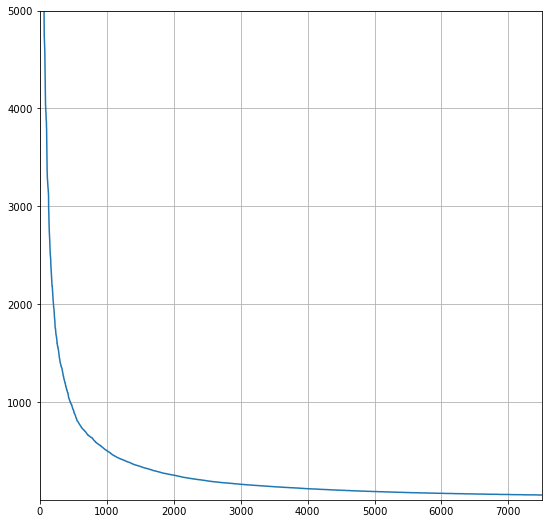

In [16]:
# here we are plotting a graph between number of words with their frequency so that we can graphically see 
# how many words hvae larger count and words which have fewer count
features = SortedDictionary
ans1=[]
ans2=[]

for ele in range(len(features)):
    ans1.append(ele)
    ans2.append(features[ele][1])
plt.figure(figsize=(9,9))
plt.plot(ans1,ans2)
plt.axis([0,7500,1,5000])
plt.grid()

In [17]:
# since we would be using top occuring words within the dictionary , we use the following code to get the top
# 200 words which are occuring in out dictionary to use them in our data modification step
topWords = [features[i][0] for i in range(2000)]

In [18]:
topWords

['edu',
 'cmu',
 'com',
 'cs',
 'ax',
 'news',
 'srv',
 'cantaloupe',
 'net',
 'message',
 'subject',
 'lines',
 'date',
 'id',
 'apr',
 'newsgroups',
 'path',
 'organization',
 'state',
 'gmt',
 'would',
 'one',
 'ohio',
 'x',
 'writes',
 'article',
 'comp',
 'references',
 'talk',
 'misc',
 'ca',
 'ans',
 'howland',
 'sender',
 'reston',
 'people',
 'like',
 'university',
 'posting',
 'nntp',
 'cc',
 'know',
 'mps',
 'sci',
 'host',
 'get',
 'think',
 'usenet',
 'zaphod',
 'may',
 'politics',
 'alt',
 'c',
 'windows',
 'also',
 'p',
 'rutgers',
 'harvard',
 'time',
 'use',
 'r',
 'near',
 'eng',
 'e',
 'q',
 'new',
 'system',
 'us',
 'good',
 'rec',
 'noc',
 'crabapple',
 'sei',
 'well',
 'soc',
 'das',
 'could',
 'xref',
 'u',
 'g',
 'even',
 'cis',
 'europa',
 'gtefsd',
 'see',
 'ece',
 'religion',
 'way',
 'uunet',
 'w',
 'world',
 'b',
 'uk',
 'god',
 'two',
 'org',
 'make',
 'say',
 'n',
 'much',
 'christian',
 'many',
 'gov',
 'first',
 'right',
 'de',
 'rochester',
 'distribut

In [19]:
# this step can be called as data modification as we are modifing the the data according to the topwords and making a 
# dataset to use it for traning out model 
# here we iterate over the len of X_train and for that range , we acces words , split the words and checek if it
# is present in the topwrod array , if it is present in topword array , we would increase the frequency of that words.
# we are accessing words within X[i][1] , here 1 corresponds to the file , 0 would be corresponding to the file name

X_train_dataset=np.zeros([len(X_train),len(topWords)],int)
for i in range(len(X_train)):
    words=X_train[i][1].lower()
    strippedWords=re.split(r'\W+',words)
    #Iterating over each word
    for word in strippedWords:
        #We will add the frequency corresponding to that word only which is in our answer
        if word in topWords:
            X_train_dataset[i][topWords.index(word)]+=1

In [20]:
# similar step from above are followed to make the test dataset for out model
X_test_dataset=np.zeros([len(X_test),len(topWords)],int)
for i in range(len(X_test)):
    words=X_test[i][1].lower()
    strippedWord=re.split(r'\W+',words)
    #Iterating over each word
    for word in strippedWord:
        #We will add the frequency corresponding to that word only which is in our answer
        if word in topWords:
            X_test_dataset[i][topWords.index(word)]+=1

In [21]:
print(X_train_dataset) , print(X_train_dataset.shape)

[[11  7  0 ...  0  0  0]
 [ 8  1  0 ...  0  0  0]
 [ 8  3  5 ...  0  0  0]
 ...
 [ 6  1  4 ...  0  0  0]
 [ 5  3  4 ...  0  0  0]
 [10  5  1 ...  0  0  0]]
(14997, 2000)


(None, None)

In [22]:
print(X_test_dataset) , print(X_test_dataset.shape)

[[ 4  2  7 ...  0  0  0]
 [ 6  2  3 ...  0  0  0]
 [ 5  1  1 ...  0  0  0]
 ...
 [12  2  1 ...  0  0  0]
 [ 3  3  5 ...  0  0  0]
 [14  3  0 ...  0  0  0]]
(5000, 2000)


(None, None)

In [23]:
algo = MultinomialNB()

In [24]:
algo.fit(X_train_dataset,y_train)

MultinomialNB()

In [25]:
pred = algo.predict(X_test_dataset)

In [29]:
print('Score on training data----->' , algo.score(X_train_dataset,y_train))
print('Score on testing data------>' , algo.score(X_test_dataset,y_test))

Score on training data-----> 0.8576381943055278
Score on testing data------> 0.8246


In [30]:
print(classification_report(y_test,pred))

                          precision    recall  f1-score   support

             alt.atheism       0.82      0.80      0.81       257
           comp.graphics       0.74      0.81      0.77       252
 comp.os.ms-windows.misc       0.97      0.12      0.22       283
comp.sys.ibm.pc.hardware       0.58      0.84      0.68       263
   comp.sys.mac.hardware       0.71      0.88      0.78       229
          comp.windows.x       0.76      0.79      0.78       238
            misc.forsale       0.75      0.92      0.83       256
               rec.autos       0.85      0.91      0.88       254
         rec.motorcycles       0.91      0.94      0.92       263
      rec.sport.baseball       0.91      0.91      0.91       256
        rec.sport.hockey       0.95      0.90      0.92       258
               sci.crypt       0.99      0.94      0.96       242
         sci.electronics       0.79      0.87      0.83       242
                 sci.med       0.96      0.89      0.93       238
         

In [ ]:
# here we can see that we are getting a score of 85.76 % on training dataset and a 82.46% from our testing dataset

## Implementation of Naive Bayes

In [1]:
# fit function is our function through which we would be making our dictionary .
# within our dictionary we would have layers , ie dictionary within dictoinary to store , words , their count , total doc

def fit(X_train_dataset,y_train):
    count={}
    total_word=0
    y_train=np.array(y_train)
    #Total no. of document is calculated
    count["total_doc"]=len(y_train)
    classes=set(y_train)
    for i in classes:
        temp=0
        #selecting x_train corresponding to class present in y_train
        X_train_with_i=X_train_dataset[y_train==i]
        #finding length of data with category corresponding to i 
        temp2=X_train_with_i.shape[0]
        count[i]={}
        #Iterating over answer1(actual feature list)
        for feature in topWords:
            #Calculating total word in feature
            l=(X_train_with_i[:,topWords.index(feature)]).sum()
            count[i][feature]=l
            temp+=l
        #Total word in that class
        count[i]["word_in_class"]=temp
        #Length of data with y_train belonging to specific class
        count[i]["length"]=temp2
        
    
    return count

In [46]:
# this function returs us the probability corresponding to the words based on dictionary and classes available

def probability(X_test,dic,classes):
    num1 =np.log(dic[classes]['length'])
    den1 =np.log(dic['total_doc'])
    prob= num1 - den1
    feature=list(dic[classes].keys())
    #-2 is done becuase there will be "length" and "word in class" present in feature. 
    for j in range (len(feature)-2):
        xj=X_test[j]
        #If frequency is 0, we will not consider it
        if xj==0:
            current_prob=0
        else:
            #Extra addition part is Laplace correction
            num=dic[classes][feature[j]]+1
            den=dic[classes]["word_in_class"]+len(dic[classes].keys())-2
            current_prob=np.log(num)-np.log(den)
        prob+=current_prob
    return prob

In [34]:
#Best_class or probable answer will be returned from here
def predict_for_single(X_test,dic):
    first_run=True
    classes=dic.keys()
    for i in classes:
        if i=="total_doc":
            continue
        prob=probability(X_test,dic,i)
        if first_run or prob>best_prob:
            best_prob=prob
            first_run=False
            best_class=i
    return best_class

In [39]:
# this function returs ous the prediction on our test dataset
def predict(X_test,dic):
    y_pred=[]
    for x in X_test:
        y_pred.append(predict_for_single(x,dic))
    return y_pred

In [36]:
# this function reeturs ous the score matric so that we can see how well our model is working
def score(y_test,y_pred):
    count=0
    for ele in range(len(y_pred)):
        if y_pred[ele]==y_test[ele]:
            count+=1
            
    return count/len(y_pred)

In [48]:
dictionary1 = fit(X_train_dataset,y_train)

In [49]:
y_pred_training = predict(X_train_dataset,dictionary1)

In [50]:
y_pred_testing = predict(X_test_dataset,dictionary1)

In [52]:
score1 = score(y_train,y_pred_training)
score2 = score(y_test , y_pred_testing)
score1,score2

(0.8659731946389277, 0.8384)

In [54]:
print(confusion_matrix(y_test,y_pred_testing))

[[217   1   0   0   0   0   0   1   0   1   0   0   1   2   0   2   0   1
    0  31]
 [  0 216   0  13   7   2   7   0   0   1   0   0   4   2   0   0   0   0
    0   0]
 [  0  46   9 132  24  39  11   0   1   0   0   2  16   1   1   0   0   0
    1   0]
 [  0   5   0 232  21   0   2   0   0   0   0   1   2   0   0   0   0   0
    0   0]
 [  0   2   0   6 217   0   4   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0  39   0   7  11 175   2   0   0   0   0   0   3   1   0   0   0   0
    0   0]
 [  1   0   0   3   1   0 241   6   0   0   0   0   2   1   1   0   0   0
    0   0]
 [  0   1   0   0   0   0   8 236   3   0   0   0   5   1   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   5   5 251   1   0   0   0   0   0   0   1   0
    0   0]
 [  0   0   0   0   0   0   3   0   0 244   8   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   2   0   1  12 240   0   0   1   0   0   0   0
    2   0]
 [  0   1   0   0   0   0   2   1   0   0   0 234   3   0   0   0

In [55]:
print(classification_report(y_test,y_pred_testing))

                          precision    recall  f1-score   support

             alt.atheism       0.81      0.84      0.83       257
           comp.graphics       0.68      0.86      0.76       252
 comp.os.ms-windows.misc       1.00      0.03      0.06       283
comp.sys.ibm.pc.hardware       0.59      0.88      0.71       263
   comp.sys.mac.hardware       0.76      0.95      0.85       229
          comp.windows.x       0.81      0.74      0.77       238
            misc.forsale       0.80      0.94      0.87       256
               rec.autos       0.93      0.93      0.93       254
         rec.motorcycles       0.97      0.95      0.96       263
      rec.sport.baseball       0.93      0.95      0.94       256
        rec.sport.hockey       0.96      0.93      0.95       258
               sci.crypt       0.98      0.97      0.97       242
         sci.electronics       0.80      0.95      0.87       242
                 sci.med       0.94      0.94      0.94       238
         

In [57]:
# comparisn of scores
print("score of inbuit classifier:")
print("Score on training data:",algo.score(X_train_dataset,y_train))
print("Score on testing data:",algo.score(X_test_dataset,y_test))
print("-----------------")
print("score of self implementation: ")
s1=score(y_train,y_pred_training)
s2=score(y_test,y_pred_testing)
print("Score on training data:",score1)
print("Score on testing data:",score2)

score of inbuit classifier:
Score on training data: 0.8576381943055278
Score on testing data: 0.8246
-----------------
score of self implementation: 
Score on training data: 0.8659731946389277
Score on testing data: 0.8384


In [2]:
# we can we our , by using inbuilt model , we are getting a score of nearlly 865 on training dataset and 82% on testing
# datset. On the other hand , with out self implementation of text classifier , we are getting score of nearlly 87% on 
# training dataset and 84% on testing dataset . Based on the comparision we are getting nearlly close score
# between our implementation and inbuilt models